In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df = df.rename(columns={"3.159499363321345566e-02": "X", "9.869877579082642072e-01": "Y" , "0.000000000000000000e+00" : "class"})

In [4]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
import matplotlib.pyplot as plt

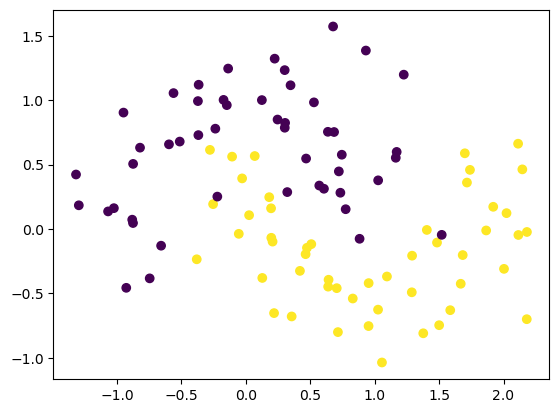

In [6]:
plt.scatter(df['X'] , df['Y'], c=df['class'])

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import tensorflow

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(2, activation='sigmoid' , input_dim=2))
model.add(Dense(1, activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[-0.6675994 ,  0.7598448 ],
        [ 0.8770665 , -0.63240844]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.8956772 ],
        [-0.23514497]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights  = model.get_weights()

In [14]:
# Get the current weights of the model
weights = model.get_weights()

# Create initial_weights list with zeros of the same shape as the original weights
initial_weights = []
for i in range(len(weights)):
    # Create a zero array with the same shape as the corresponding weight
    initial_weights.append(np.zeros(weights[i].shape))


In [15]:
X =np.array(X)
y = np.array(y)

In [16]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [17]:
history = model.fit(X , y , epochs=100 , validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.4315 - loss: 0.7817 - val_accuracy: 0.4000 - val_loss: 0.8088
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4550 - loss: 0.7718 - val_accuracy: 0.4000 - val_loss: 0.8080
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4042 - loss: 0.7864 - val_accuracy: 0.4000 - val_loss: 0.8072
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4042 - loss: 0.7896 - val_accuracy: 0.4000 - val_loss: 0.8063
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4315 - loss: 0.7758 - val_accuracy: 0.4000 - val_loss: 0.8054
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4159 - loss: 0.7805 - val_accuracy: 0.4000 - val_loss: 0.8046
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4471 - loss: 0.7785 - val_accuracy: 0.4000 - val_loss: 0.8037
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4120 - loss: 0.7748 - val_accuracy: 0.4000 - val_loss

In [18]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step 


<Axes: >

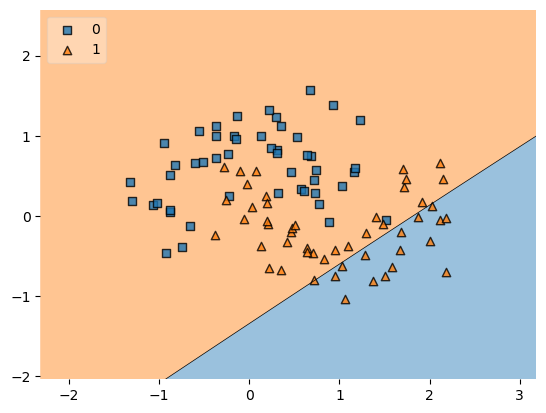

In [19]:
plot_decision_regions (X,y.astype('int') , clf=model , legend=2)

In [20]:
weights

[array([[-0.6675994 ,  0.7598448 ],
        [ 0.8770665 , -0.63240844]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.8956772 ],
        [-0.23514497]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
model.get_weights()

[array([[-0.41350073,  0.53804463],
        [ 0.6051077 , -0.39576158]], dtype=float32),
 array([-0.16698274,  0.15897936], dtype=float32),
 array([[ 0.6567559 ],
        [-0.08911227]], dtype=float32),
 array([-0.12012394], dtype=float32)]